# Data Science - Social Media Analytics SoSe 24 📊🔍

## Problemset 1 📝

This notebook represents my submission for the weekly tasks in Social Media Analytics for the summer semester of 2024.

### Authors 👥
- **Martin Brucker** (942815) 🧑‍💻
- **Frederik Brinkmann** (943915) 🧑‍💻

**Due**: Friday, 5th April 2024, 11:59 PM

**Contact Information**: martin.brucker@student.fh-kiel.de 📧


# Exersice 1 🤠

Your task is to scrape articles from Deutsche Welle (DW) along with additional metadata about
the articles.

Use the Python Package BeautifulSoup to extract the following information from this
website and store it in a Python dictionary:

1. author
1. date
1. title
1. summary (text printed in bold letters at the beginning)
1. main text
1. related topics (Minorities, Women’s rights, . . . )


• Analyze the article: what additional information (metadata or other) related to this article
is available? Make a list of such items. Then pick one of these items, extract it also from
this website, and update your dictionary with this item.


• Print the dictionary

In [50]:
# importing the required lib's
import requests
import pandas as pd

# !pip install beautifulsoup4
from bs4 import BeautifulSoup

In [51]:
## creating an instance of the BeautifulSoup class and setup the html parser

# the URL is the given URL from wich the html code is downloaded
url = "https://www.dw.com/en/why-south-korean-women-arent-having-babies/a-68419317"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

In [52]:
# Extracting information directly without creating separate variables
resultDict = {
    "author": soup.find("div", class_="author-details").get_text(),
    "date": soup.time.get_text(),
    "title": soup.title.get_text(),
    "summary": soup.find(class_="teaser-text").get_text(),
    "main_text": [p.get_text() for p in soup.find_all("p") 
                  if "cookie__text" not in p.get("class", []) and "vjs-no-js" not in p.get("class", [])],
    "related_topics": [a.get_text() for a in soup.aside.find_all("a")]
}

# Note: The 'main_text' filters out unnecessary <p> elements
# with classes 'cookie__text' and 'vjs-no-js'

#### Brainstorming additional information

* Image information (amount/url/size/alt text)
* Subsection Headlines (amount/text)
* Links to other pages (amount/connections)


In [53]:
## getting the sub-section headlines from the article

# add the sub_sections to the earlyer created dictionary
resultDict["sub_headlines"] = [h2.get_text() for h2 in soup.find_all("h2", class_=None)]


In [54]:
# printing the final dict
print(resultDict)

{'author': 'Julian Ryall', 'date': '03/01/2024', 'title': "Why South Korean women aren't having babies – DW – 03/01/2024", 'summary': 'New statistics show a record low number of children were born last year in South Korea, with women citing a desire for a career and to push back against a male-dominated society as key reasons.', 'main_text': ['New statistics show a record low number of children were born last year in South Korea, with women citing a desire for a career and to push back against a male-dominated society as key reasons.', 'When she was younger, Hyobin Lee yearned to be a mother. There came a point, however, when she had to make a difficult decision. Ultimately, she chose her career over a family and is now a successful academic in the South Korean city of Daejeon.', "Lee, now 44, is just one of millions of Korean women who are making a conscious decision to remain childless — resulting in the nation's fertility rate dropping to a new record low.", 'The fertility rate — th

# Exersice 2 🤠

- Your task is to scrape all articles (only media type “Article”) from 01.03.2024 extracting the same type of information as in exercise 1. Store the information in a Pandas DataFrame such that a single row represents one article, and that the columns represent the extracted features (author, date, . . . ).
 Hint: First, you need to extract the urls tothe single articles published on that day. Secondly, you need to open, parse, and extract information from each of these articles.

- Scrape politly by including delays between requests and by scraping not more data than
you actually need.
- Print the shape of the DataFrame and display its first five rows. Display it in such a way
that all columns are visible.

In [55]:
# importing more libs to transform into datetime and set a sleep timer
import datetime
import time

## Task Split: Collecting URLs and Extracting Relevant Data 🌟

The task will be divided into two major code blocks:

1. **URL Collection (01.03.2024) 📅**:
   In this block, we'll collect all URLs to articles published on March 1, 2024.

2. **Data Extraction from Links 🕵️‍♂️**:
   In the second code block, we'll extract relevant data such as author names, publication dates, and article titles from the collected URLs.


In [56]:
# defining variables
articleLinks = []
page = 10
more_pages = True
target_date = "01.03.2024"

while more_pages == True:

    print(f"Now scraping page {page}")

    url = f"https://www.dw.com/search/?languageCode=en&contentType=ARTICLE&from={target_date}&to={target_date}&sort=DATE&resultsCounter={page}"
    html = requests.get(url).text
    soup = BeautifulSoup(html, "html.parser")
    
    # Extracting the article links
    news = soup.select("div.searchResult")
    articleLinks.extend([article.a["href"] for article in news])

    # Checking if there are more pages to scrape
    if soup.select("a.addPage"):
        page += 10
    else:
        more_pages = False


    time.sleep(1)   

print(f"Finished scraping {len(articleLinks)} article URL's")

Now scraping page 10


Now scraping page 20
Now scraping page 30
Now scraping page 40
Finished scraping 92 article URL's


In [59]:
def scrape_article_data(article_links):
    result = []

    for i, article in enumerate(article_links):
        # output the scraping status
        if i % 10 == 0:
            print(f"Finished {i / len(article_links) * 100:.2f}%")

        url = f"https://www.dw.com{article}"
        html = requests.get(url).text
        soup = BeautifulSoup(html, "html.parser")

        data = {}
        

        ## it follows the wall of try and except to avoid the code from breaking
        # in the case an element is not found

        try:
            data["author"] = soup.find("div", class_="author-details").get_text()
        except AttributeError:
            data["author"] = None

        try:
            data["date"] = soup.time.get_text()
        except AttributeError:
            data["date"] = None

        try:
            data["title"] = soup.title.get_text()
        except AttributeError:
            data["title"] = None

        try:
            data["summary"] = soup.find(class_="teaser-text").get_text()
        except AttributeError:
            data["summary"] = None

        ## for the main_text we have to filter out some unnecessary <p> elements
        # with classes 'cookie__text' and 'vjs-no-js'
        data["main_text"] = [p.get_text() for p in soup.find_all("p")
                             if "cookie__text" not in p.get("class", []) and "vjs-no-js" not in p.get("class", [])]
        
        data["related_topics"] = [a.get_text() for a in soup.aside.find_all("a")] if soup.aside else []

        result.append(data)
        time.sleep(1)

    print(f"Finished scraping {len(result)} articles")
    return result

scraped_data = scrape_article_data(articleLinks)

Finished 0.00%
Finished 10.87%
Finished 21.74%
Finished 32.61%
Finished 43.48%
Finished 54.35%
Finished 65.22%
Finished 76.09%
Finished 86.96%
Finished 97.83%
Finished scraping 92 articles


In [60]:
#converting the scraped data into a pandas dataframe
articlesAsDataFrame = pd.DataFrame(scraped_data)

# transform the date into a datetime object
articlesAsDataFrame["date"] = pd.to_datetime(articlesAsDataFrame["date"], exact=False, format="%m/%d/%Y")

articlesAsDataFrame.head()

,author,date,title,summary,main_text,related_topics
0,Dirk Kaufmann,2024-03-01,Apple pulls the plug on its self-driving e-car...,Apple has ended its decadelong autonomous vehi...,[Apple has ended its decadelong autonomous veh...,"[Electric vehicles, Apple, Artificial intellig..."
1,None,2024-03-01,Iran elections: Low turnout in parliamentary v...,Iran's parliamentary elections saw low voter t...,[Iran's parliamentary elections saw low voter ...,"[Iran protests, Jina Mahsa Amini, Iran]"
2,None,2024-03-01,Germany: Tesla plant protesters to spend week ...,Treehouses and a piano concert in the woods: A...,[Treehouses and a piano concert in the woods: ...,"[Rhine River, Poverty in Germany, Greta Thunbe..."
3,None,2024-03-01,Nicaragua says Germany facilitates genocide by...,Nicaragua has filed a case at the Internationa...,[Nicaragua has filed a case at the Internation...,"[Rhine River, Poverty in Germany, Robert Habec..."
4,Cai Nebe,2024-03-01,Why some African countries have strange shapes...,Arbitrary boundaries were drawn on maps to sep...,[Arbitrary boundaries were drawn on maps to se...,"[Namibia, Cameroon, Togo, Tanzania]"


<Axes: title={'center': 'Most frequent writer on 2024-03-01'}, xlabel='Count', ylabel='author'>

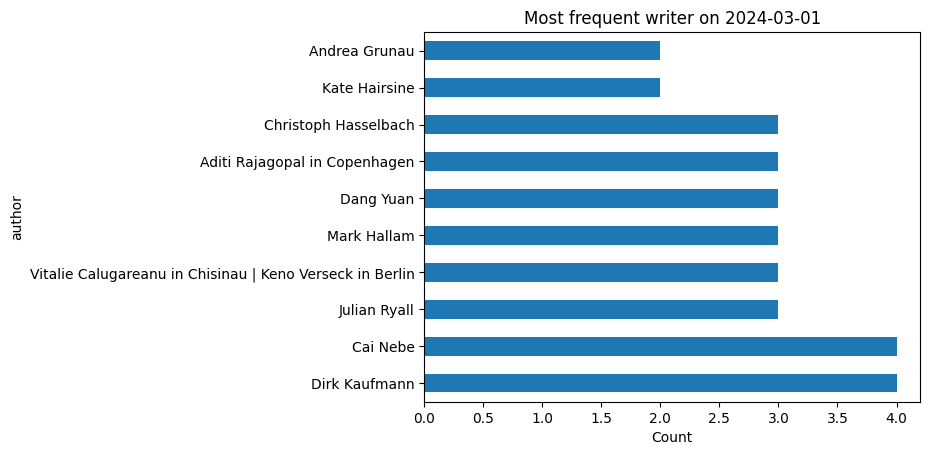

In [62]:
articlesAsDataFrame["author"].value_counts().head(10).plot(
    title="Most frequent writer on 2024-03-01", xlabel="Count", kind="barh")

<Axes: title={'center': 'Top 10 related topics'}, xlabel='Count', ylabel='related_topics'>

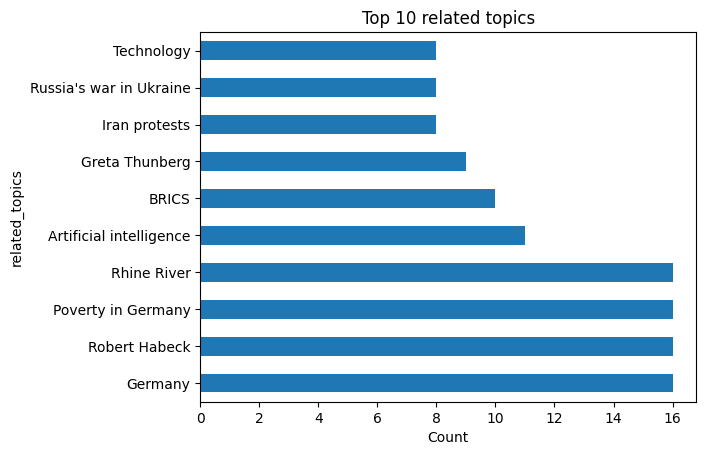

In [63]:
# display the most used related_topics
articlesAsDataFrame["related_topics"].explode().value_counts().head(10).plot(
    title="Top 10 related topics", xlabel="Count", kind="barh")